In [18]:
import pandas as pd
import os

In [19]:
folder_path = 'till'

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

accelerometer = pd.read_csv(os.path.join(folder_path, 'Accelerometer.csv'))
gyroscope = pd.read_csv(os.path.join(folder_path, 'Gyroscope.csv'))
pedometer = pd.read_csv(os.path.join(folder_path, 'Pedometer.csv'))
metadata = pd.read_csv(os.path.join(folder_path, 'Metadata.csv'))

In [20]:
metadata.columns

Index(['version', 'device name', 'recording epoch time', 'recording time',
       'recording timezone', 'platform', 'appVersion', 'device id', 'sensors',
       'sampleRateMs', 'standardisation'],
      dtype='object')

In [21]:
accelerometer.rename(columns={'x': 'accelerometer_x','y': 'accelerometer_y','z':'accelerometer_z'} , inplace=True)
gyroscope.rename(columns={'x': 'gyroscope_x','y': 'gyroscope_y','z':'gyroscope_z'} , inplace=True)

In [22]:
len(accelerometer), len(gyroscope), len(pedometer), len(metadata)

(7792, 7773, 8, 1)

In [23]:
merged = pd.merge_asof(accelerometer, gyroscope, on='time',direction='nearest')

In [24]:
name = merged.time[0]

In [25]:
merged['label'] = metadata['device id'][0]

In [26]:
merged.to_csv(folder_path+'.csv', index=False)

In [27]:
import seaborn as sns

<Axes: xlabel='time', ylabel='Count'>

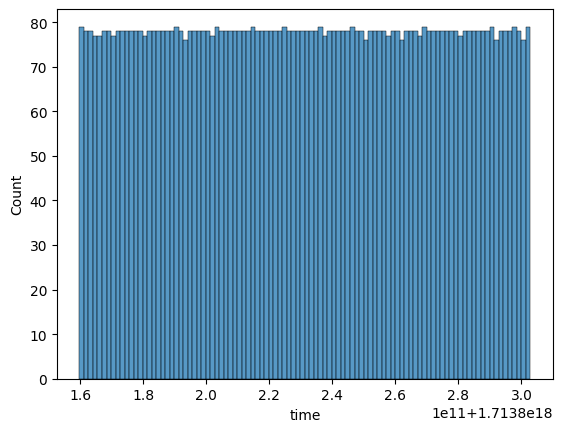

In [30]:
sns.histplot(accelerometer, x= 'time', bins=100)

In [40]:
accelerometer2 = pd.read_csv(os.path.join(folder_path, 'ACG.csv'),sep=';')
gyroscope2 = pd.read_csv(os.path.join(folder_path, 'GYRO.csv'),sep=';')

In [42]:
len(accelerometer2), len(gyroscope2)

(8153, 8151)

In [43]:
merged2 = pd.merge(accelerometer2, gyroscope2, on='t_Android',how='inner')

In [44]:
merged2

,t_Android,t_unix_x,x_x,y_x,z_x,a_x,t_unix_y,x_y,y_y,z_y,a_y
0,1725331306517250,1714391220209,3.790829,-0.303290,8.617152,3,1714391220209,-0.815963,-0.791529,-0.001069,3
1,1725331308732134,1714391220209,3.790829,-0.303290,8.617152,3,1714391220209,-0.815963,-0.791529,-0.001069,3
2,1725331310948525,1714391220209,3.790829,-0.303290,8.617152,3,1714391220209,-0.815963,-0.791529,-0.001069,3
3,1725331313164894,1714391220209,3.790829,-0.303290,8.617152,3,1714391220209,-0.815963,-0.791529,-0.001069,3
4,1725331315380226,1714391220209,3.790829,-0.303290,8.617152,3,1714391220209,-0.815963,-0.791529,-0.001069,3
...,...,...,...,...,...,...,...,...,...,...,...
8146,1725349356042030,1714391238216,1.144966,7.151549,7.030711,3,1714391238216,-0.441350,0.079718,0.058643,3
8147,1725349358258034,1714391238216,1.144966,7.151549,7.030711,3,1714391238216,-0.441350,0.079718,0.058643,3
8148,1725349360476601,1714391238216,1.144966,7.151549,7.030711,3,1714391238216,-0.441350,0.079718,0.058643,3
8149,1725349362686805,1714391238216,1.144966,7.151549,7.030711,3,1714391238216,-0.441350,0.079718,0.058643,3


<Axes: xlabel='t_Android', ylabel='Count'>

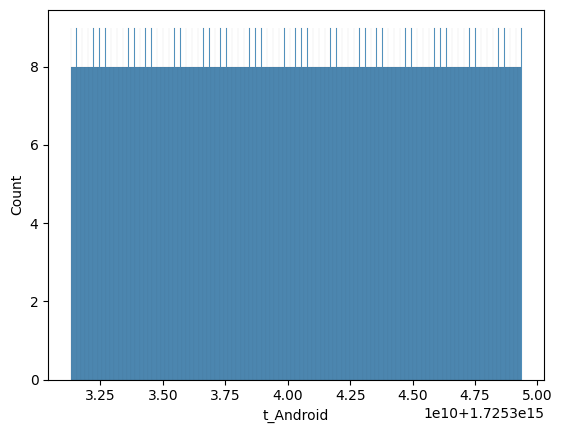

In [65]:
sns.histplot(merged2, x= 't_Android', bins=1009)

In [53]:
(merged2.t_Android.max() - merged2.t_Android.min())/ len(merged2)

2215480.0326340324

In [62]:
(merged2.t_unix_x.max(), merged2.t_unix_x.min(), merged2.t_unix_y.max(), merged2.t_unix_y.min())

(1714391238216, 1714391220209, 1714391238216, 1714391220209)

In [63]:
len(merged2)/18

452.8333333333333